# Podstawy Julii

## Zmienne

In [1]:
x = 1
x + 1
x = 1 + 1
println(x)
x = "Hello World!"

2


"Hello World!"

Nazwy zmiennych są wrażliwe na wielkość liter i mogą używać kodowania UTF-8. Muszą zaczynać się od litery, podkreślenia lub znaku Unicode > 00A0.
W odpowiednio skonfigurowanym edytorze można wprowadzać znaki przez nazwy podobne jak w LaTeX-u i tabulator (np. \alpha<TAB>).

In [2]:
α = 0.1

0.1

### Zadanie

Zapisać wzór na masę zredukowaną w Julii korzystając ze znaków Unicode
$$
\mu = \frac{m_1 m_2}{m_1 + m_2}
$$

In [4]:
m₁ = 2
m₂ = 1
μ = (m₁ * m₂)/(m₁ + m₂)

0.6666666666666666

## Liczby

Wbudowane typy liczbowe obejmują liczby całkowite i zmiennoprzecinkowe, o różnej dokładności (Int8-Int128, Float16-Float64). Tworząc zmienną bez deklaracji typu, powierzamy jego identyfikacje automatowi

In [5]:
x = 1
typeof(x)

Int64

In [6]:
x = 1.0
typeof(x)

Float64

In [7]:
x = 0x01
typeof(x)

UInt8

In [8]:
x = 0x0001
typeof(x)

UInt16

In [9]:
x = 0b01
typeof(x)

UInt8

In [10]:
x = 0o010
typeof(x)

UInt8

Maksymalną i minimalną liczbę całkowitą danej reprezentacji można uzyskać przez `typemin(T)` i `typemax(T)`. Funkcja `bitstring()` zwraca reprezentację bitową w postaci ciągu znaków

In [11]:
typemin(Int64)

-9223372036854775808

In [12]:
bitstring(typemax(Int64))

"0111111111111111111111111111111111111111111111111111111111111111"

Liczby zmiennoprzecinkowe są 64 (domyślnie) lub 32 bitowe

In [13]:
x = 1.0
typeof(x)

Float64

In [14]:
x = 1.0e-5
typeof(x)

Float64

In [15]:
x = 1.0f-5
typeof(x)

Float32

### Zadanie
Sprawdzić działanie funkcji `eps()`, `nextfloat()`, `prevfloat()` i reprezentacji bitowej uzyskanych wyników

In [21]:
bitstring(1.0e15)

"0100001100001100011010111111010100100110001101000000000000000000"

In [20]:
bitstring(nextfloat(1.0e15))

"0100001100001100011010111111010100100110001101000000000000000001"

## Operatory matematyczne
* x + y
* x - y
* x * y
* x / y
* x ÷ y (\div<TAB>, lub div(x, y)
* x % y    
* x^y
* oraz odpowiednie +=, -=, *=, ...

### Zadanie 3
Sprawdzić działanie operatorów na zmiennych typu Int i Float, oraz typ otrzymanego wyniku

## Operatory logiczne
* !x
* x || y (lub) - y jest sprawdzane tylko jeżeli x jest fałszywe
* x && y (i) - y jest sprawdzane tylko jeżeli x jest prawdziwe

In [39]:
x = 2
x >= 0 && sqrt(x)

1.4142135623730951

## Operatory bitowe
* ~x (negacja)
* x & y (i)
* x | y (lub)
* x ⊻ y (albo = xor(x, y))
* x >>> y (przesunięcie logiczne - nie zachowuje bitu znaku)
* x >> y (przesunięcie arytmetyczne - zachowuje bit znaku)


### Zadanie 4
Sprawdzić działanie przesunięc w prawo dla x = Int8(-64)

In [47]:
x = Int8(-64)
println(bitstring(x), " ⟹ ", x)
println(bitstring(x >> 1), " ⟹ ", x >> 1)
println(bitstring(x >>> 1), " ⟹ ", x >>> 1)

11000000 ⟹ -64
11100000 ⟹ -32
01100000 ⟹ 96


## Operatory "z kropką"
Dla każdego operatora binarnego (+, -, ...) jest zdefiniowany operator z kropką (.+, .-, ...), który działa
na macierzach powtarzając operację dla każdego elementu.
Podobna składnia obowiązuje funkcje (np. sin.(x))
Makro `@.` przerabia każdy operator i funkcję na wersję z kropką.

In [48]:
x = [1, 2, 3]
println(x .^ 2)
println(sin.(x))

[1, 4, 9]
[0.8414709848078965, 0.9092974268256817, 0.1411200080598672]


In [49]:
@. sqrt(sin(x) + 2x + 1)

3-element Vector{Float64}:
 1.9599670876848665
 2.430904651940442
 2.6722874112003496

## Porównania liczb
Liczby i zmienne można porównywać typowymi operatorami (==, !=, >=, <=). Operatory można łączyć w łańcuchy (jak w Pythonie), np.
0 <= x < 1


In [50]:
x = 0.5
0 <= x < 1

true

Operatory porównują wyrażenia zgodnie ze standardem IEEE754 - w szczególnych przypadkach (NaN, Inf) prowadzi to do zaskakujących wyników

In [51]:
println(NaN == NaN)
println(NaN < NaN)
println(NaN > NaN)
println(Inf == Inf)
println(Inf > Inf)
println(Inf > NaN)
println(-0.0 == 0.0)
println(bitstring(-0.0))
println(bitstring(0.0))

false
false
false
true
false
false
true
1000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000


W pewnych sytuacjach mogą pomóc specjalne funkcje isequal(), isfinite(), isnan(), isinf()

In [61]:
println(isequal(NaN, NaN))
println(isequal(-0.0, 0.0))

true
false


Kolejność operatorów
* ^
* √
* << >> >>>
* * / %
* + - | & ⊻
* : .. (składnia: range, )
* |> (pipe)
* <|
* < > == >= != ...
* && || ?
* => (para)
* = += -= *= ...
* 


### Zadanie 5
Sprawdzić następujące wyrażenia 
* 1 == 3 & 1 == 1
* 1:2 .+ 3

In [70]:
# Poprawnie
(1 == 3) & (1 == 1)
(1:2) .+ 3

4:5

## Rzutowanie typów
* T(x) (gdzie T to typ np. Float64, Int64, ...)
* convert(T, x)
* round(x)
* round(T, x)
* round(T, x, digits=n)
* ceil/floor/trunc (x), (T, x)

### Zadanie 6
Sprawdzić działanie powyższych funkcji dla różnych konwersji (Int - Float)


## Funkcje matematyczne
* div
* fld
* cld
* mod
* abs
* abs2
* sign
* sqrt
* cbrt
* exp
* log
* log10
* log(b, x)
* sin
* cos
* tan
* asin
* acos
* atan
* isone
* iszero

stałe
* pi, \pi<TAB>
* \euler<TAB>

## Ciągi znaków

Typ `Char` reprezentuje pojedynczy znak (32-bitowa zmienna). Znak powinien być objęty cudzysłowem `'`. Wartości z tablic Unicode można wpisać korzystając z `\u` (liczba hex 4 cyfry) lub `\U` (liczba hex 8 cyfr)

In [88]:
c = 'x'
println(typeof(c))
println(Int64(c))
println(Char(120))
println('\u2200')

Char
120
x
∀


Ciągi znaków (`String`) są definiowane przez cudzysłów `"`, lub trzy cudzysłowy `"""`. Mogą zawierać znaki Unicode (co powoduje pewne problemy pokazane poniżej. Ze względu na różną liczbę bitów kodującą znaki, indeks ostatniego znaku nie koniecznie jest długością ciągu. Indeksowanie elementów (tak jak i w innych strukturach) zaczyna się od `1`.

In [89]:
s = "Hello world!\n"
println(s)
println(s[1], " ", s[end-1], " ", s[1:3])
s2 = "α² + β² = \u03DE²"
println(s2)
#println(s[1], " ", s[2])
println(collect(eachindex(s)))
println(collect(eachindex(s2)))

Hello world!

H ! Hel
α² + β² = Ϟ²
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 17]


Sklejanie ciągów (concatenation) dokonujemy operatorem `*` (matematyczna idea jest taka, że `+` jest operatorem komutującym, a `*` niekoniecznie, sklejanie nie jest komutującą operacją).

In [90]:
"Ala " * "ma " * "kota."

"Ala ma kota."

Interpolacja to wstawianie zmiennych lub wyrażeń do ciągu znaków w miejscu oznaczonym znakiem `$` (jak w bashu). W związku z tym ten znak traktowany dosłownie musi być wstawiany jako `\$`.

In [91]:
println("$")

LoadError: syntax: invalid interpolation syntax: "$""

In [92]:
s = "2 + 2 = $(2 + 2)"

"2 + 2 = 4"

In [93]:
x = 3.14159
println("π ≈ $x")

π ≈ 3.14159


In [94]:
v = [1, 2, 3]
println("v = $v")

v = [1, 2, 3]


In [95]:
howmuch = 100.0
println("Jesteś mi winny \$$howmuch")

Jesteś mi winny $100.0


## Instrukcje kontrolne

### if elseif else

In [ ]:
x = 0
if x > 0
    println(">0")
elseif x < 0
    println("<0")
else
    println("=0")
end

Instrukcja `if` musi mieć podaną zmienną typu Bool, w odróżnieniu od C, Pythona i wielu innych języków nie można użyć jej w następujący sposób 

In [ ]:
if 1
    println("TAK")
end

### Pętla while

In [ ]:
x = 1
while x <=5 
    println(x)
    x += 1
end

W pętlach działają typowe polecenia `continue` i `break`

### Pętla for

Pętla for zasadniczo iteruje po jakiejś kolekcji (macierzy, łańcuchu, zakresie, zbiorze,...). Zamiast słowa `in` można użyć `\in<TAB>` lub `=`.

In [ ]:
for i in 1:5
    println(i)
end

Składnia `1:5` daje tzw. zakres (range), specjalny typ zdefiniowany przez 3 liczby: początek, krok i koniec. W odróżnieniu od np. Pythona koniec jest zawarty.

In [ ]:
typeof(1:5)

Krok jest definiowany przez środkową liczbę.

In [ ]:
for i in 1:0.1:2
    println(i)
end
typeof(1:0.1:2)

Zamiast tej składni można użyć funkcji `range(start, stop; length, step)` podająć dwie z start, stop, length lub trzy wielkości ze wszystkich (pozostałe zostaną wyliczone automatycznie).

In [ ]:
for i in range(stop=0, step=0.2, length=5)
    println(i)
end

In [ ]:
for i in [3, 5, 8]
    println(i)
end

for i ∈ "ABC"
    println(i)
end

Ciekawostką jest skrócony zapis zagnieżdżonych pętli

In [ ]:
for i in 1:3, j in i:3
    println(i, " ", j)
end

Podobnie jak w Pythonie istnieje też funkcja `zip` sklejącą kolekcje

In [ ]:
for (i, j) in zip(1:3, 4:7)
    println(i, " ", j)
end

### try-catch

Również podobnie jak w innych językach działa pętla try-catch obsługująca wyjątki. Po złapaniu wyjątku można go obsłużyć sprawdziając jego typ funkcją `isa()`. W przypadku konieczności wyrzucenia wyjątku posługujemy się funkcją `throw()`, np. `throw(DomainError(x, "x musi być większy od zera"))`.

In [ ]:
s = begin
    x = 2
    #x = -2 + 0im
    try
        sqrt(x[2])
    catch err
        if isa(err, DomainError)
            sqrt(complex(x[2], 0))
        elseif isa(err, BoundsError)
            sqrt(x)
        end
    end
end
println(s)

## Typy
Julia posiada system typów dynamiczny. Każdy typ należy do drzewa typów. Zmienne nie muszą mieć deklarowanych typów (wtedy zostanie im nadany automatycznie), ale mogą, jeżeli jest to potrzebne do wydajności, czytelności lub użycia "multiple dispatch".

Typy występują w trzech odmianach:
* abstrakcyjne (definują strukturę drzewa typów)
* typy konkretne (nie ma sensu dodawać nowych)
* unie typów (abstrakcyjne)
* typy złożone (struktury)
* typy parametryczne (odpowiednik templatów)

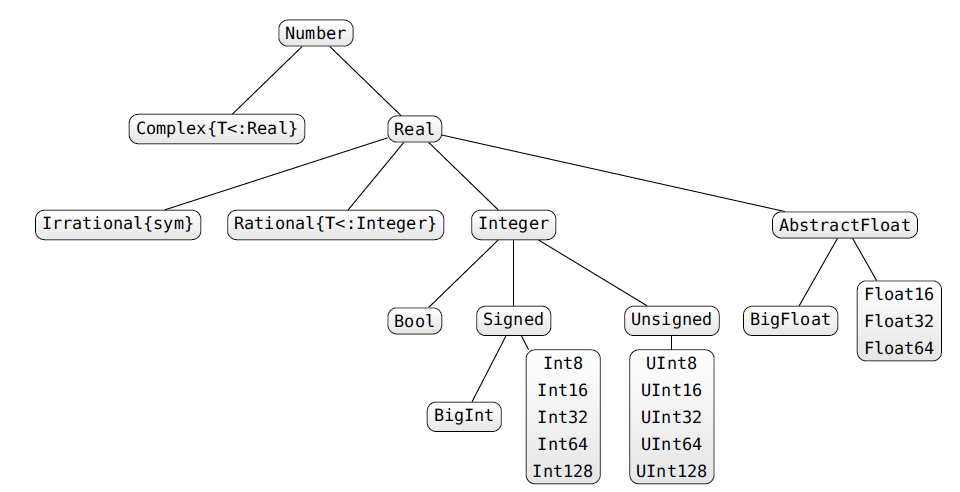

Operator `<:` (jest podtypem) może być używany do tworzenia nowego typu, albo zwraca prawdę/fałsz w wyrażeniach testujących hierachię typów

In [ ]:
println(Int64 <: Real)
println(Float64 <: Signed)

### Unia
Unia typów to abstrakcyjny typ zawierający wszystkie wymienione typy
`Union{Int64, Float64}`. Przy analizie wydajności zwykle oznacza to niestabilność typową funkcji, co daje wolniejszy kod.

### Typy złożone
Typy złożone to struktury lub obiekty składające się z nazwanych pól. 
W odróżnieniu od języków obiektowych struktury w Julii nie zawierają funkcji, które aby korzystać z mechanizmów
multiple dispatch żyją na zewnątrz struktur.

Nowy obiekt jest tworzony po wywołaniu struktury pod postacią funkcji (konstruktor). Dostęp do pól jest przez notację z kropką (`A.a`).

In [ ]:
struct Point
    x::Float64
    y::Float64
    name::String
end

p0 = Point(0.0, 0.0, "origin")
println(p0, " ", typeof(p0))
println(p0.x)

Tak zadeklarowane obiekty są niezmienne. Dzięki temu mogą być kopiowane przez kompilator (są nierozróżnialne) i lokowane na stosie (stack). 

In [ ]:
p0.x = 1.0

Struktura zmienna jest deklarowana przez `mutable struct`. Ten typ nie może być z góry roztrzygnięty przez kompilator. Jest umieszczany na stercie (heap).

In [ ]:
mutable struct PointM
    x::Float64
    y::Float64
    name
end

p1 = PointM(0.0, 0.0, "M")
println(p1, " ", typeof(p1.name))
p1.name = 1.0
println(typeof(p1.name))

### Typy parametryczne
Typ parametryczny (zwyczajowo oznaczony jako `T`) jest odpowiednikiem konternerów w C++. Dzięki temu można tworzyć ogólne elastyczne struktury, których konkretne realizacje zależą od końcowego typu.

In [ ]:
struct PointP{T}
    x::T
    y::T
end

p0 = PointP{Int64}(0, 0)
p1 = PointP{Float64}(0.0, 0.0)
println(typeof(p0))
println(typeof(p1))

Zakres i typ `T` można zawęzić poprzez operator `<:`

In [ ]:
struct PointR{T <: Real}
    x::T
    y::T
end

p0 = PointR{String}("A", "B")

### Typy abstrakcyjne
Służą do definiowania drzewa typów. W poniższym przykładzie abstrakcyjny typ `Curve` ma podtypy `Circle`, `Line`. Z kolei struktura `Region` zawiera macierz obiektów typu `Surface`, a więc mogą być to zarówno linie, jak i okręgi.

In [ ]:
abstract type Curve end

struct Line <: Curve
    x1::Float64
    y1::Float64
    x2::Float64
    y2::Float64
end

struct Sphere <: Curve
    x0::Float64
    y0::Float64
    R::Float64
end

struct Region
    curves::Array{Curve, 1}
    operators::Array{Bool, 1}
end

l1 = Line(0.0, 0.0, 0.0, 1.0)
s1 = Sphere(0.0, 0.0, 1.0)

r1 = Region([l1, s1], [true, true])
println(r1)


## Funkcje

Funkcje w Julii nie są czysto matematycznymi funkcjami, ponieważ w ogólności mogą modyfikować argumenty. Jeżeli funkcja zachowuje się w ten sposób to oznacza się ją zwyczajowo wykrzyknikiem, np
```
sort(x)
sort!(x)
```
są dwiema wersjami sortowania, `sort(x)` zwraca nowy wektor, a `sort!(x)` sortuje w miejscu (więc modyfikuje argument).

Składnia:



In [ ]:
function f1(x, y)
    return 2x + y
end

Δ(x, y) = abs(x - y)

Słowo `return` oznacza oczywiście zwrócenie wartości i wyjście z funkcji w miejscu wywowałnia. Jeżeli go nie użyjemy funkcja zwróci ostatnią wykonaną operację

Funkcje są takimi samymi obiekatami jak zmienne, więc również można je np. przekazywać

In [ ]:
function f2(x, y)
    2x + y
    x
end

println(f(1, 1))

Funkcje są takimi samymi obiekatami jak zmienne, więc również można je np. przekazywać

In [ ]:
function d(f, x)
    return f2(x, x)
end

k = d
println(k(f, 2))
println(k(Δ, 2))
    

Deklaracja typów nie wpływa na wydajość, ale może służyć rozróżnianiu wersji funkcji

In [ ]:
function f(x::Int64, y::Int64)
    return 2(x + y)
end

function f(x::Float64, y::Float64)
    return √2(x + y)
end

println(f(1, 1))
println(f(1.0, 1.0))

Podobnie można zadeklarować typ zwracanej wartości, ale jest to rzadko używane (lepiej pisać kod stabilny typowo i zostawić roztrzygnięcie kompilatorowi).

In [ ]:
function fi(x, y)::Int64
   x + y
end

println(fi(1, 1))
@code_native fi(1, 1)
println(fi(1.0, 1.0), " ", typeof(fi(1.0, 1.0)))
@code_native fi(1.0, 1.0)

### Zadanie
Na podstawie publikacji C. Lanczosa napisać funkcję wyznaczająca wartość funkcji Gamma.

### WIele zwracanych wartości
Funkcja może zwracać wiele wartości jednocześnie

In [ ]:
function m(x, y)
    return x + y, x - y
end

a, b = m(1, 1)
println(a, " ", b)

### Wartości domyślne


In [ ]:
function p(x, y::Int64=1)
    return x^y
end

println(p(2))
println(p(2, 2))

### Slupring (siorbanie)


In [ ]:
function f(a, b, c...)
    return a * b .+ c
end

println(f(1, 2, 3, 4, 5))

a, b... = "hello"
println(a, " ", b)

### Funkcje anonimowe
Funkcje anonimowe (lambda) to funkcje bez nazwy, typowo przekazywane do innych funkcji. Klasycznym przykładem jest przekazanie funkcji anonimowej do funkcji `map`, która wykonuje ją potem na każdym elemencie kolekcji. Składnia funkcji anomimowej używa strzałki `->` np. 

`x -> x^2 + 1`

In [ ]:
println(map(round, [1.43, 1.51, 1.67]))

Takie wywołanie działa jeżeli chcemy użyć istniejącej funkcji. Ale jeżeli chcemy zaokrąglenia z zadaną dokładnością lub zupełnie innej operacji możemy użyć funkcji anonimowej.

In [ ]:
println(map(x->round(x, digits=1), [1.43, 1.51, 1.67]))
println(map(x->sqrt(x + 1), [1.43, 1.51, 1.67]))

Większość operatorów w Julii jest także funkcjami. Np. `+` jest funkcją `+(x, y)`.

Każda funkcja może mieć różne wersje, w zależności od typów argumentów. O dostępne metody możemy się zapytać polecieniem `methods`.

In [ ]:
methods(f)

In [ ]:
methods(+)

### Zadanie
Do pokazanych wcześniej struktur `Region` napisać funkcję zwracającą prawdę jeżeli przekazany punkt jest wewnątrz regionu i fałsz jeżeli na zewnątrz. Region jest zdefiniowany przez krzywe i operatory (prawda/fałsz), które decydują czy jest on wewnątrz czy na zewnątrz danej krzywej. 

W przypadku prostej dany punkt jest wewnątrz jeżeli wyznacznik macierzy

$\det\left|A B\right|$

jest dodatni (zakładamy, że punkt na krzywej nie jest wewnątrz), gdzie $\vec{A} = \vec{x_2} - \vec{x_1}, \vec{B} = \vec{x} - \vec{x_1}$, gdzie $\vec{x_1}, \vec{x_2}$ to punkty definujące prostą, $\vec{x}$ punkt o który pytamy. 

## Krotki (tuple)
Krotki to niezmiennicze kolekcje deklarowane przez nawiasy okrągłe `()`. Krotki nazwane są bardzo podobne, oprócz tego, że argumenty mają przypisane nazwy i można się do nich odnosić przez notację z kropką.

In [ ]:
k = (3, 5, 8)
println(k[1])
k = (a=3, b=5, c=8)
println(k[2], " ", k.b)

## Słowniki

Słowniki to standardowa struktra zbudowana na zasadzie par klucz-wartość. Klucze i wartości mogą mieć różne typy. Najprostszym sposobem stworzenia słownika jest wymienienie elementów i powiązanie ich w pary operatorem `=>`.

In [ ]:
d = Dict("A" => 1, "B" => 2)

Jak widać typ został nadany automatycznie. Możemy go także podać podczas tworzenia bezpośrednio. Poniżej pusty słownik String, Any (czyli przechowujący dowolne elementy)

In [ ]:
d = Dict{String, Any}()
d["A"] = 1
d["B"] = "b"
d["C"] = [1, 2, 3]
println(d)

Przypisanie d["A"] tworzy nowy element lub zmienia istniejący. Odwołanie się do nieistenijącego elementu powoduje wyrzucenie błędu. Aby sprawdzić czy dany klucz jest w słowniku można użyć funkcji `haskey`. Funkcja `keys` zwraca wszystkie klucze, `values` - wartości, `pairs` - pary.

In [ ]:
println(haskey(d, "D"))
for (k, v) in pairs(d)
    println(k, " ", v)
end

## Macierze

Macierz to kolekcja elementów przechowywana na wielowymiarowej siatce. Bazowym typem dla wszystkich macierzy jest `AbstractArray`. Wszystkie macierze są przekazywane do funkcji przez `dzielenie się` (np. za pomocą wskaźników). Oznacza to, że jeżeli funkcja modyfikuje macierz (kończy się na `!`), a chcemy zachować oryginał, musimy wykonać kopię.

## Tworzenie macierzy
Macierze są tworzone przez kilka różnych składni
1. Bezpośrednie podanie elementów


In [ ]:
A = [1, 2, 3]

In [ ]:
A = [1 2 3]

Jak widać w Julii istnieje różnica pomiędzy wektorami (macierzami kolumnowymi), a macierzami poziomymi!

Wielowymiarowe macierze tworzymy przez użycie nowych linii lub średników (elementy są łączone werykalnie). Podwójny średnik łączy horyzontalnie.

In [ ]:
A = [1 2 3
    4 5 6]

In [ ]:
A = [1 2 3; 4 5 6]

In [ ]:
A = [[1, 2] [3, 4] [5, 6]]

In [ ]:
A = [[1, 2], [3, 4], [5, 6]]

Możemy również użyć zasięgów

In [ ]:
A = [1:4 9:12]

In [ ]:
A = [1:4, 9:12]

In [ ]:
A = [1:4; 9:12]

In [ ]:
A = [1:4;; 9:12]

2. Typowe macierze można tworzyć specjalnymi funkcjami

In [ ]:
A = zeros(2, 3)

In [ ]:
A = zeros(Int64, 2, 3)

In [ ]:
A = ones(2, 3)

In [ ]:
A = rand(2, 3)

In [ ]:
A = randn(2, 3)

3. Podobnie jak np. w Pythonie macierze i inne kolekcje można tworzyć także za pomocą generatorów

In [ ]:
A = [i for i in 1:10]

4. Niezainicjowana macierz

In [ ]:
A = Array{Float64}(undef, 3, 3)

5. Pusta macierz

In [ ]:
A = Array{Float64, 1}()

In [ ]:
A = Array{Float64}(undef, 0, 0)

### Typowe operacje

In [ ]:
A = [1 2 3; 4 5 6]

In [ ]:
length(A)

In [ ]:
size(A)

In [ ]:
reshape(A, 3, 2)

In [ ]:
reinterpret(Int32, A)

In [ ]:
B = A
C = copy(A)

In [ ]:
fill!(B, 0)
fill!(C, 1)
@show A 
@show B
@show C

In [ ]:
x = [0, 1, 2]
push!(x, 3)

In [ ]:
append!(x, [4, 5, 6])

In [ ]:
prepend!(x, -1)

## Moduły
Rozszerzenia (biblioteki) w Julia są w postaci modułów. Dokładniejszą budową modułów zajmiemy się później. W tym miejscu potrzebne nam będą polecenia importujące moduły: `using` i `import`.

`using` - ładuje kod modułu oraz jego nazwę i wyeksportowane elementy do globalnej przestrzeni nazw

`import` - ładuje kod modułu oraz tylko jego nazwę do globalnej przestrzeni nazw

W Pythonie byłby to odpowiednik `from X import *` (using) oraz `import X` (import).

In [ ]:
import LinearAlgebra

A = Matrix{Float64}(LinearAlgebra.I, 2, 2)

In [ ]:
using LinearAlgebra

B = Matrix{Float64}(I, 2, 2)

## Pomiar szybkości

Ponieważ wydajność jest jedną z kluczowych założeń Julii, staramy się, aby kod był możliwie szybki. Aby ocenić jego jakość musimy mieć jakieś narzędzia.

Najprostszą metodą jest makro `@time`, `@timev` i `@elapsed`

In [ ]:
function simplesum(N)
    s = 0
    for i in 1:N
        s +=i 
    end
    s
end

println("simplesum time")
@time simplesum(10000000)
println("sum time")
@time sum(1:1000000)
println("simplesum timev")
@timev simplesum(1000000)
println("sum timev")
@timev sum(1:1000000)
println("simplesum elapsed")
@elapsed simplesum(1000000)
println("sum elapsed")
@elapsed sum(1:1000000)

Te metody pozwalają ocenić prędkość, ale nie są statystycznie wiarygodne, bo mogą zawierać czas kompilacji, a pojedyncza próba może nie być reprezentacyjna.

Moduł BenchmarkTools dostarcza bardziej wiarygodnych narzędzi `@btime` i `@benchmark`, które wskazują także na użycie pamięci.

In [ ]:
using BenchmarkTools

@btime simplesum(1000000)
@benchmark simplesum(1000000)

Jeszcze bardziej szczegółowych informacji można uzyskać korzystając z profilera (moduł Profile).

In [ ]:
using Profile
@profile simplesum(1000000)
Profile.print()

In [ ]:
@profile sum(1:1000000)
Profile.print()

## Przykład
Rozważmy następujący problem: chcemy znaleźć indeks najmniejszego elementu w danej tablicy. Jeżeli taki sam wyraz występuje więcej niż jeden raz, chcemy dostać losowy element (z równym prawdopodobieństwem).

Julia nie posiada wbudowanej procedury tego typu. Możemy natomiast użyć kilku wbudowanych funkcji (`minimum`, `filter`, `rand` oraz `eachindex`), aby osiągnąc pożądany rezultat.

In [ ]:
function randminarg1(a)
    m = minimum(a)
    rand(filter(i -> a[i] == m, eachindex(a)))
end

x = [1, 2, 3, 1, 1, 3]
randminarg1(x)

Logika jest tu prosta: 
* szukamy najmniejszego elementu (`minimum`)
* dla każdego indeksu (`eachindex` tworzy wydajny iterator chodzący po kolekcjach) sprawdź, czy element jest równy najmniejszemu
* zwróć losowy element (`rand`) listy indeksów

Sprawdzimy działanie funkcji na większej próbce

In [ ]:
using StatsBase

countmap([randminarg1(x) for i in 1:10000])


`countmap` z modułu StatsBase zwraca mapę (słownik) unikatowych wyrażeń występujących w kolekcji oraz liczbę ich wystąpień.

Algorytm, który tu zastosowaliśmy musi przeglądać tablicę dwa razy. Czy jest to najlepszy sposób? 
Okazuje się, że można zrobić to w jednym przejściu tablicy:
* Jeżeli spotkasz nową najmniejszą wartość to ją zapamiętaj `minval` i jej indeks `imin`
* Jeżeli ta wartość została już spotkana `b` razy, to `imin` powinien przechowywać indeks każdej z nich z prawdopodobieństwem $1/b$.
* Jeżeli spotkamy nowe miejsce jej występowania to z prawdopodobieństwem $1/(b+1)$ powinniśmy go przechować. Wtedy każdy z poprzednich wyrazów będzie miał prawdopodobieństwo przechowywania:
$$
   \frac{1}{b} \times (1 - \frac{1}{b + 1}) = \frac{1}{b}\frac{b}{b+1} = \frac{1}{b+1}
$$

Nasz algorytm, podobnie jak powyższy powienien działać dla dowolnych kolekcji (nie tylko jednowymiarowego wektora). Dlatego użyjemy *iteratora* poruszającego się po kolekcji indeksów.
`iterate()` zwraca krotkę zawierającą dwie wartości - kolejny (lub pierwszy) element kolekcji oraz stan (który można podawać do następnych iteracji. Jeżeli kolekcja się skończy, funkcja zwróci `nothing`.

In [ ]:
function randminarg2(a)
    indices = eachindex(a)
    y = iterate(indices)
    y == nothing && throw(ArgumentError("collection must be non-empty"))
    (idx, state) = y
    minval = a[idx]
    bestidx = idx
    bestcount = 1
    y = iterate(indices, state)
    while y !== nothing
        (idx, state) = y
        current = a[idx]
        if isless(current, minval)
            minval = current
            bestidx = idx
            bestcount = 1
        elseif isequal(current, minval)
            bestcount += 1
            rand() * bestcount < 1 && (bestidx = idx)
        end
        y = iterate(indices, state)
    end
    bestidx
end



Sprawdzamy działanie

In [ ]:

countmap([randminarg2(x) for i in 1:10000])

Wreszcie przetestujemy wydajność jednego i drugiego podejścia

In [ ]:
using BenchmarkTools

x = rand(1:100, 100)
@benchmark randminarg1($x)

In [ ]:
@benchmark randminarg2($x)

Dla większych rozmiarów tablic randminarg2 jest wolniejsze niż randminarg1! Proszę sprawdzić profilerem dlaczego!

### Zadanie
Napisać funkcję sumującą wyrazy dwuwymiarowej macierzy w wersji iterującej najpierw po wierszach i najpierw po kolumnach. Sprawdzić prędkość dla losowych macierzy 10^4x10^4. Zoptymalizować znalezione problemy i porównać czas z wbudowaną funkcją `sum`.